<img src="../imgs/logo.png" width="20%" align="right" style="margin:0px 20px">


# Evolutionary Computation

## 1.3 Evolutionary Algorithms

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a>&nbsp;| Dennis G. Wilson | <a href="https://d9w.github.io/evolution/">https://d9w.github.io/evolution/</a>

## Outline

+ Part 1
+ Part 2

In [9]:
using Plots
using Random
using Statistics

In [28]:
mutable struct Individual
    genes::BitArray
    fitness::Int64
end

function Individual(n::Int64)
    Individual(bitrand(n), 0)
end

n = 20
ind = Individual(n)

Individual(Bool[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1], 0)

In [29]:
function onemax(ind::Individual)
    sum(ind.genes)
end

ind, onemax(ind)

(Individual(Bool[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1], 0), 9)

In [30]:
function evaluate!(ind::Individual, objective::Function)
    ind.fitness = objective(ind)
end

evaluate!(ind, onemax)
ind

Individual(Bool[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1], 9)

In [24]:
parent = Individual(n)
evaluate!(parent, onemax)

10

In [25]:
function mutate(ind::Individual; mutation_rate::Float64=1.0/length(ind.genes))
    new_genes = copy(ind.genes)
    for i in eachindex(new_genes)
        if rand() < mutation_rate
            new_genes[i] = ~ind.genes[i]
        end
    end
    Individual(new_genes, 0)
end

mutate (generic function with 1 method)

In [26]:
child = mutate(parent)
evaluate!(child, onemax)
print(parent.genes .== child.genes)

Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]

In [20]:
if child.fitness >= parent.fitness
    parent = child
end
parent.fitness

11

In [21]:
for i in 1:5
    child = mutate(parent)
    evaluate!(child, onemax)
    if child.fitness >= parent.fitness
        parent = child
    end
end

print(parent.fitness, " / ", n)

12 / 20

In [31]:
function one_plus_one(ind_length::Int, num_generations::Int, f::Function)
    fits = zeros(num_generations)
    parent = Individual(ind_length)
    evaluate!(parent, f)
    
    for i in eachindex(fits)
        child = mutate(parent)
        evaluate!(child, f)

        if child.fitness >= parent.fitness
            parent = child
        end

        fits[i] = parent.fitness
    end
    fits
end

one_plus_one (generic function with 1 method)

982.0


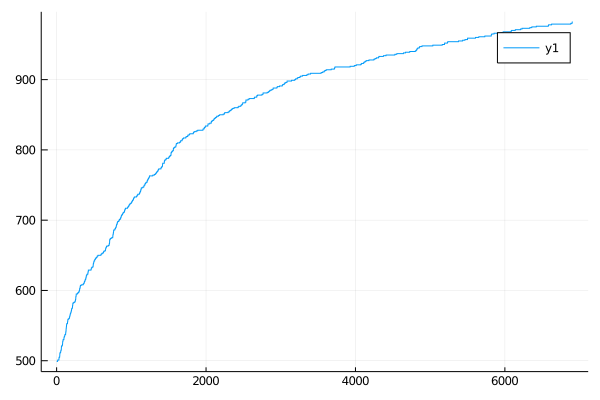

In [32]:


n = 1000
fits = one_plus_one(n, Int(round(n * log(n))), onemax)
println(fits[end])
plot(fits)

